# Python 速習（polars編）

（このノートブックは、本書に記載されているコードの一部を polars　ライブラリを使って書き換えています。）

小規模な（例えば100件程度の）データを整理して保存する程度の目的であれば、マイクロソフトの Excel に代表される表計算ソフトで十分に間に合うでしょう。しかしながら、データサイズが大きくなり、ワークシートの行数や列数が増えてくると、「マウス操作」を前提としたソフトウェアでの作業は非常に効率が悪くなります。また、マウス操作による作業は、後日、手順の再現に戸惑うことも多くなります。さらに、Excel などに備わっているデータ分析機能やグラフィックス作成機能は非常に貧弱です。

そこで表計算ソフト以外のツールの利用を推奨します。データサイエンスやAIが広く活用されている現在、データ解析ツールには多数の選択肢があります。まず、有償のソフトウェアとしては、SPSS や SAS, MATLAB が有名です。一方、無償で自身のコンピュータにインストールして使えるツールとして、プログラミング言語である R や Python が世界的に普及しています。実際のところ、データサイエンスの分野では、R と Python が実質的なスタンダードとなっており、インターネット上にも多数の情報が溢れています。ぜひとも自身で検索してみてください。また R あるいは Python は、Google Colaboratory や Mirosoft AzureML, Amazon SageMaker Studio Lab などのクラウド環境で利用することもできます。クラウド環境で利用できるという意味は、パソコンに何かを追加でインストールする必要がなく、デフォルトで導入されているブラウザのウィンドウ内でコードを書いて実行できるという意味です。


本書では、Python というプログラミング言語を使って日本語テキストをデータとして処理し、分析する方法を学びます。そこで、最初に Python およびデータサイエンス周りのパッケージ（拡張機能）の使い方を紹介します。


## Python


Python の導入には複数の方法があり、利用している OS （Windows か Mac か、あるいは Linux か）や、利用目的によっても異なってきますが、本書ではデータ分析を実施するツールとして Python を利用します。Python の言語仕様やコード設計について詳細を解説することはいたしませんが、データ分析を実行するのに必要な技術については詳しく説明します。


なお、Python のライブラリにはバージョンごとに相性の問題があり、今後 Python ないしライブラリのアップデートされることによって、本書の掲載どおりの出力にならない、あるいは掲載コードが動かないということがあるかもしれません。その場合、筆者が気がついた範囲で本書のサポートサイトに変更点に関する情報を記載する予定です。
一方で、Python には仮想環境という考え方があります。これはデフォルトのPython実行環境からは分離されたPython環境を用意し、デフォルトとは異なるバージョンのライブラリを構築するものです。

本書と同じ出力を得たいという読者は venv などを使って、ライブラリのバージョンを固定した仮想環境を整備されるとよいでしょう（ただし仮想環境を用意しなければ操作できなということではありません）。
以下は、仮想環境を作成する例です。この命令は、コマンドプロンプト（ターミナル）で行います。


```
$ pytnon3 -m venv working
$ cd working
$ source bin/activate
(working)$ pip install -f requirements.txt
(working)$ jupyter-notebook &
```

なお初めて `pip` コマンドを実行した際には以下のように警告が表示されることがあります。


```
WARNING: You are using pip version **.*.*, however version **.*.* is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
```

この場合はアップデートしておきます。


In [ ]:
!pip install -U pip


## Pythonの導入
### Google Colaboratory

もっとも簡単な方法は、自身のコンピュータに Python をインストールせずに、Google の Colaboratory という WEB サービスを利用することです。[^Colab]

[^Colab]: https://colab.research.google.com




### MacOS/Windows

MacOS にせよ Windows によせ、データサイエンスでの利用を主な目的として Python を導入するのであれば、**Anaconda** [^Anaconda] を使うのが一番簡単でしょう。


それでは Anaconda をインストールしましょう。まず Anaconda のトップページから Products の Individual Editon をクリックし、自身の OS に合わせてインストーラーをダウンロードします。
基本的にインストーラーをダブルクリックするだけで Python と関連ライブラリがインストールされます。ただし注意点として、Windows の場合、途中でインストールタイプを選択する必要がありますが、ここでは All Users を選ぶ方がよいでしょう。Just Me (recommended) を選ぶと、利用しているパソコンの設定によっては（たとえば、Windows でユーザー名として日本語を使っていると）問題が生じる可能性があります。逆に MacOS では「個人環境向けにインストール」を選んだ方がよいです（MacOS にすでに Python2 が組み込まれているので、新規に追加する Python3 とシステム設定が衝突する恐れがあるからです）。さらに、Windowsでは、「Add Anaconda to the system PATH environment variable」にはチェックを入れず、その下の、「Register Anaconda as the system Python」にチェックが入っていることを確認してください。ただし、繰り返しになりますが、Anaconda のサイト構成やインストール方法は、今後変更される可能性があります。インストールを試みる前に、自身でインターネットを検索などして事前に情報を収集することをお勧めします。



## Jupyterの起動

Window ではファイルメニューで [Anaconda]->[jupyter notebook] を選択すると、自動的にブラウザが起動します。場合によってはコマンドプロンプトという黒い画面上で、表示された URL (http::/localhost あるいは http:127.0.0.1 で始まるアドレス)をブラウザを起動して指定するよう求められることがあるかもしれません。

Macでは「アプリケーション」フォルダに Anaconda-Navigator がインストールされていますので、これを起動し、Jupyter を launch するボタンを押します。



ブラウザ画面の右メニュー [New] から [Python3]を選択すると、新しくタブが開きます。

まずは簡単な Python のコードを入力し、実行してみましょう。`import sys` と入力し、改行してまた `sys.version` と入力します。ここで、Shift キーを押しながら Enter を押すと、入力欄（以下、セルと表現します）下に実行結果が表示されるはずです。



以下、Jupyter を利用する上での注意点を箇条書きでまとめます。

- 入力可能な領域は「セル」と呼ばれる
- Enterを押すと入力モードに戻る
- セルでは「Code」モードと「Markdown」モードの違いに気をつける
- 説明など地の文はセルで（Escキーをいったん押してから） M キーを押して Markdownモードに変更
- Python のコードを入力する場合は M キーを押してCodeモードに変更
- Shift キーを押しながら Enter を押すと、そのセルの内容は確定される（コードは実行され結果が下に出力される）
- Code モードで入力途中に Tab を押すと、関数名などの入力を補助する機能が利用できる





## 四則演算と変数、代入



In [1]:
1 + 2 + 3 

6

`[out]` という表示に続いて、計算結果が出力されているでしょう。加減乗除 は Excel と同じ記号 (`+-*/`) を使って書き表します。なお、上記では数値と`+`の間に半角スペースを挟んでいますが、`1+2+3` としても同じです。ただ、スペースを挟んだほうが見やすいとはいえます。

さて、プログラミング言語を覚える上で最初の難関となるのが**変数**(variable)という概念でしょう。

In [2]:
x = 1 + 2 + 3
print(x)
y = 'Hello World'
print(y)

6
Hello World




ここで `print()` の少し高度な機能を紹介しましょう。`print()` の役割は画面への文字出力ですが、出力のスタイルを調整することができます。以下に例を示します。




In [3]:
print('% 演算子')
pi = 3.14
print('pi = %.3f' % pi)
 
print('formatを使った例')
print('{0} = {1}'.format('pi', pi))

print('f 文字列の利用')
age = 22

print('ｆ文字列に変数をブラケットで囲んで指定')
print(f'私は{age}歳です。')

num = 1234567890
print('3桁ごとにカンマを挿入')
print(f'{num:,}')

print('小数点以下の桁数表示')
pi = 3.141

print('小数点2位まで')
print(f'pi = {pi:.2f}')
#
print('指定された桁数だけゼロを追加')
print(f'pi =  : {pi:.5f}')

% 演算子
pi = 3.140
formatを使った例
pi = 3.14
f 文字列の利用
ｆ文字列に変数をブラケットで囲んで指定
私は22歳です。
3桁ごとにカンマを挿入
1,234,567,890
小数点以下の桁数表示
小数点2位まで
pi = 3.14
指定された桁数だけゼロを追加
pi =  : 3.14100



上記では **%演算子**といわれる機能や `format` 関数、あるいは**ｆ文字列**という機能を使って出力を調整しています。詳しくは Python の公式マニュアル(https://docs.python.org/ja/3/)などで確認してください。


In [5]:
%%script false --no-raise-error
## 文字と数値の計算なので本来はエラーとなる
print('あ' + 1)
## あえて実行すると以下のようなエラーとなる

TypeError: can only concatenate str (not "int") to str

## 関数を定義する

Python には多くの関数が用意されていますが、自分自身で作成（定義）することもできます。たとえば、入力された数値に、その 10 倍の値、さらに 100 倍の値を加算した結果を返す関数を定義してみましょう。


In [6]:
def my_func(x):
    tmp = x + 10 * x + 100 * x
    return(tmp)
print('関数を引数として 3 を与えて実行する')
my_func(3)

関数を引数として 3 を与えて実行する


333



## 条件分岐


上で作成した `my_func()` に、処理結果が偶数であれば偶数、奇数であれば奇数と表示する機能を加えてみましょう。 


In [7]:
def my_func(x=10):
    tmp = x + 10 * x + 100 * x
    if tmp % 2 == 0:
        print('偶数')
    else:
        print('奇数')
    return(tmp)

print('引数に 3 を与えて実行')
my_func(3)

引数に 3 を与えて実行
奇数


333

In [8]:
def my_func(x=10):
    tmp = x + 10 * x + 100 * x
    if tmp % 2 == 0:
        print('偶数')
    else:
        print('奇数')
    return(tmp)

print('関数を引数なしで実行する')
my_func()

関数を引数なしで実行する
偶数


1110

## 繰り返し処理

ある処理を繰り返し行いたい場合があります。たとえば、1 から 10 までを足し算する処理を考えてみましょう。


In [9]:
x = 0
for i in range(1, 11):
    x = x + i
x

55

In [10]:
range(1, 11)

range(1, 11)

## リストとスライス
ここまで変数には1つの値（1や3.14）を代入しました。一方、複数の値を1つの変数に紐付けることもできます。以下のようにします。


In [11]:
x = [1, 2, 3, 4]
x 

[1, 2, 3, 4]

In [13]:
x [0]

1



| 0 番  | 1 番  | 2 番  | 3 番  | 4 番  |
|-------|-------|-------|-------|-------|
| 1     | 2     | 3     | 4     | 5     |
| -5 番 | -4 番 | -3 番 | -2 番 | -1 番 |



以下、実際にスライスを使った例を示します。

In [14]:
x = [1, 2, 3, 4, 5]
print('2つ目（1番）から3つ目（3番）まで')
print(x[1:4])

print('2つ目（3番）まで')
print(x[ :3])

print('後ろから3つ目以降')
print(x[-3: ])

print('逆順に出力')
print(x[ : : -1])

2つ目（1番）から3つ目（3番）まで
[2, 3, 4]
2つ目（3番）まで
[1, 2, 3]
後ろから3つ目以降
[3, 4, 5]
逆順に出力
[5, 4, 3, 2, 1]



なお、Pythonではコード中に`#` を挿入すると、その右から改行まではコメントとみなされます。自分が書いたコードの意味や目的をメモする際にコメントを使うと便利です。

## タプル



In [15]:
x = [0, 1, 2]
print('リストは要素を変更できる')
x[2] = 34
print(x)
## タプル
y = (0, 1, 2)

print('タプルは要素を変更できないのでエラーとなる')
y[2] = 45  
print(y)

リストは要素を変更できる
[0, 1, 34]
タプルは要素を変更できないのでエラーとなる


TypeError: 'tuple' object does not support item assignment

## 辞書



In [16]:
ids = {'山田':18, '佐藤':20, '加藤':22, '田中':18}
print(ids['加藤'])

22


In [17]:
print('キーのリスト')
print(ids.keys())
print('値のリスト')
print(ids.values())
print('キーと値のペアをリストで表示')
print(ids.items())

キーのリスト
dict_keys(['山田', '佐藤', '加藤', '田中'])
値のリスト
dict_values([18, 20, 22, 18])
キーと値のペアをリストで表示
dict_items([('山田', 18), ('佐藤', 20), ('加藤', 22), ('田中', 18)])


In [18]:
## キーを取り出して、値を指定する
for key in ids.keys():
    print("キー = " + key + "、値 ＝" + str(ids[key]))

print("----- line break ----")

## キーと値の両方を一度に取り出す
for key, value in ids.items():
    print("キー = " + key + "：値 ＝" + str(value))

キー = 山田、値 ＝18
キー = 佐藤、値 ＝20
キー = 加藤、値 ＝22
キー = 田中、値 ＝18
----- line break ----
キー = 山田：値 ＝18
キー = 佐藤：値 ＝20
キー = 加藤：値 ＝22
キー = 田中：値 ＝18


In [19]:
print(type(1))
print(type(3.14))

<class 'int'>
<class 'float'>


同じ数値でも `int` （整数）と`float`の違いがあることが分かります。1は整数(integer)、3.14は浮動小数点数(floating point number) というクラス（「類型」ぐらいの意味）に属します。浮動小数点数は、数学でいう実数を表す方法の1つです。コンピューターの内部で数は2進法で処理されますが、2進法とは0と1のみを使う表現方法で、整数の1を2進法で表すと1ですが、2は10、3は11、4は100となります（実は文字も結局は2進法で処理されています）。コンピュータ内部で実数を表示する方法が浮動小数点です。詳細は日本語ウィキペディアの浮動小数点数 [^float] などの記述を参照してください。

[^float]: <https://ja.wikipedia.org/wiki/浮動小数点数>


一方、文字列のクラスは以下のように表示されます。ちなみに、3.14 は数値ですが、シングルコーテーションで囲った'3.14' は文字列であり、この2つは明確に区別される必要があります。

In [20]:
print(type(3.14))
print(type('3.14'))

<class 'float'>
<class 'str'>



## 正規表現

**正規表現** (regular expression) とは、簡単にいえば、文書から特定の文字列を検索したり、あるいは置換する機能のことです。




In [12]:
import re
birth = '1999年10月23日'
res = re.sub('\d', '0', birth)
print(res)

0000年00月00日


In [13]:
## 生年月日のリストを指定して一括変換
days = ['1999年1月23日', '1999年1月23日', '1999年1月23日', '1999年1月23日']
print(days)
print('リストの要素ごとに適用')
## リスト内包表記
changed = [re.sub('\d', '0', day) for day in days] 
print(changed)

['1999年1月23日', '1999年1月23日', '1999年1月23日', '1999年1月23日']
リストの要素ごとに適用
['0000年0月00日', '0000年0月00日', '0000年0月00日', '0000年0月00日']




## リスト内包表記



`['ABC', 'ABCD', 'ABCDE']` というリスト `ALPHA` が対象だとして、それぞれの文字列の'B' だけを小文字'b'にしたいとすれば、`[re.sub('B','b',i) for i in ALPHA]` と書きます。


In [14]:
ALPHA = ['ABC', 'ABCD', 'ABCDE']
[re.sub('B','b',i) for i in ALPHA]

['AbC', 'AbCD', 'AbCDE']

## イテレータとジェネレータ





すでに `range()` については紹介しています。`range(5)` とすると、0,1,2,3,4 を返す関数です。ところが、以下のように実行してみても、5個の整数は表示されないのでした。


In [15]:
x = range(5)
x

range(0, 5)

In [25]:
for i in x:
    print(i)

0
1
2
3
4


In [26]:
def generator1(n):
    tmp = []
    for i in range(n):
        tmp.append(i)
    return tmp

print('指定された整数までのリストを生成')
x1 = generator1(10)
print(f'generator1 = {x1}')
print('-----------------')
def generator2(n):
    for i in range(n):
        yield i
print('指定された整数までの数値を生成するジェネレータ')
x2 = generator2(10)
print(f'generator2 = {x2}')

指定された整数までのリストを生成
generator1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-----------------
指定された整数までの数値を生成するジェネレータ
generator2 = <generator object generator2 at 0x7f9ae4e951c0>


In [27]:
for i in x2:
    print(i)

0
1
2
3
4
5
6
7
8
9





## ライブラリ

テキスト分析にPythonを使う強みは、データ分析周りのライブラリが多数揃っていることにあります。Pythonでは、特定の用途のために作成した関数をファイル（スクリプト）に保存して使い回すことが少なくありません。こうした関数などのセットをモジュールといいます。ある用途に特化したモジュールを複数作成し、専用のフォルダ（ディレクトリ）にまとめたものを**ライブラリ**といいます。

データ分析関係では、以下のパッケージが広く使われています。

- numpy
- pandas
- scikit-learn
- scipy

また、データを可視化するには以下のライブラリが使われます。

- matplotlib
- seaborn

日本語テキストを解析できるライブラリも複数公開されています。

- python-mecab
- Janome
- spaCy
- GiNZA

なお、このノートブックでは、pandas に代わり polars というライブラリを使ってデータを操作してみます。
polars は2021に開発されたライブラリで、高速で効率的であることで知られています。また、筆者の考えでは、pandasに比べてコードがより直感的でわかりやすいようです。

https://pola-rs.github.io/polars-book/user-guide/


## テキスト分析の手順

ここで、テキストをデータとして処理する流れについて事例を紹介しましょう。なお、この節ではまだ形態素解析器は使いません。

青空文庫からファイルをダウンロードして、作品に関するメタ情報を削除する過程は、Python で自動化することができます。この方法は本書巻末に紹介しています。
また、Google Coraboratory でファイルの読み込みを行う方法についても、巻末付録で説明しています。

[^Aozora]: <https://www.aozora.gr.jp/>

## 読点による執筆者判別


ここで選んだ小説は以下になります。先にも触れたように、それぞれ50キロバイト（冒頭から1万6000文字）程度に切り詰めたファイルになっています。


| 作家     | 作品名（ファイル名）                  |
| --       | --                                    |
| 森鴎外   | 雁 (ogai_gan.txt)                    | 
| 森鴎外   | かのように (ogai_kanoyouni.txt)      |
| 森鴎外   | 鶏 (ogai_niwatori.txt)               |
| 森鴎外   | ヰタ・セクスアリス (ogai_vita.txt)   |
| 夏目漱石 | 永日小品 (soseki_eijitsu.txt)        | 
| 夏目漱石 | 硝子戸の中   (soseki_garasu.txt)     |
| 夏目漱石 | 思い出す事など (soseki_omoidasu.txt) | 
| 夏目漱石 | 夢十夜  (soseki_yume.txt)            | 



以下の手順で、読点と文字の組み合わせを取り出す処理を行います。


- 特定のフォルダ（ディレクトリ）に保存されたファイルをすべて読み込む
- ファイルごとに、読点とその直前の文字のペアを見つけてカウントする
- 各ファイルから求めた数値を表の形にまとめる
- 生成された表をデータとして数値的な分析手法を適用する

最後の数値的な分析手法として、ここでは**主成分分析**を適用します。主成分分析については後で改めて説明します。まず、フォルダからファイルを読み込む方法を説明します。


### ファイル一覧の取得と読み込み



In [7]:
import os
files = os.listdir("data/writers")
files = sorted(files)
print(files)

['ogai_gan.txt', 'ogai_kanoyoni.txt', 'ogai_niwatori.txt', 'ogai_vita.txt', 'soseki_eijitsu.txt', 'soseki_garasu.txt', 'soseki_omoidasu.txt', 'soseki_yume.txt']


In [8]:
path = os.path.abspath('data/writers')
files_path = [path + '/' + txt_name for txt_name in files]
# print(files_path)




## 文字数のカウント

次に、8つのファイルすべてを読み込み、読点と直前の文字をカウントします。

ここで scikit-learn の出番です。なお、Anacondaをインストールした環境ではすでに scikit-learn はインストールされているはずですが、念のため以下の命令をセルで実行してみてください（インストール済みであれば、その旨が英語で表示されます）。

In [31]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input = 'filename', ngram_range=(2,2), analyzer = 'char')
docs = cv.fit_transform(files_path)

In [5]:
# print(docs)

  (0, 81)	1
  (0, 15798)	2
  (0, 2563)	1
  (0, 24388)	2
  (0, 6255)	97
  (0, 2182)	106
  (0, 11808)	119
  (0, 1388)	5
  (0, 14812)	12
  (0, 9461)	1
  (0, 14749)	5
  (0, 21410)	1
  (0, 4954)	56
  (0, 12149)	13
  (0, 3536)	2
  (0, 19634)	2
  (0, 20939)	2
  (0, 15552)	1
  (0, 13734)	1
  (0, 17823)	3
  (0, 8509)	6
  (0, 15144)	20
  (0, 20200)	4
  (0, 14028)	3
  (0, 5400)	24
  :	:
  (7, 11833)	1
  (7, 12343)	1
  (7, 19541)	1
  (7, 14964)	1
  (7, 19800)	1
  (7, 2836)	1
  (7, 22912)	1
  (7, 3457)	1
  (7, 3701)	1
  (7, 23790)	1
  (7, 23796)	1
  (7, 7749)	1
  (7, 18094)	1
  (7, 8147)	1
  (7, 6111)	1
  (7, 10300)	1
  (7, 64)	1
  (7, 9534)	1
  (7, 16179)	1
  (7, 10721)	1
  (7, 9621)	1
  (7, 3737)	1
  (7, 9490)	1
  (7, 13427)	1
  (7, 9460)	1




先に生成し初期化した`cv`オブジェクトには`.vocabulary_`という属性があり、抽出されたバイグラムとそのインデックスのペアが辞書として保存されています。
確認してみましょう。


In [10]:
bigrams = [(v,k)  for k,v in (cv.vocabulary_).items()  if k in ['が、', 'て、', 'と、', 'に、', 'は、', 'も、','ら、','で、']]
print(sorted(bigrams))

[(3230, 'が、'), (5725, 'て、'), (6251, 'で、'), (6613, 'と、'), (7456, 'に、'), (9344, 'は、'), (10640, 'も、'), (11231, 'ら、')]


In [11]:
bigrams_idx = [ i[0]  for i in sorted(bigrams)]
print('バイグラムのインデックスを表示')
print(bigrams_idx)
print('配列の要素（頻度）を表示')
docs.toarray()[:, bigrams_idx]

バイグラムのインデックスを表示
[3230, 5725, 6251, 6613, 7456, 9344, 10640, 11231]
配列の要素（頻度）を表示


array([[ 66, 167,  67,  47,  55,  73,  10,  44],
       [ 66, 194,  52,  34,  81,  67,  25,  34],
       [ 48, 135,  76,  29,  36,  35,  14,  37],
       [ 63, 112,  53,  36,  47,  69,  21,  35],
       [ 31, 143,  37,  86,  41,  40,  22,  51],
       [ 28,  70,  36,  24,  41,  39,  10,  33],
       [ 38, 102,  46,  29,  32,  42,  18,  28],
       [ 33, 138,  38,  41,  39,  22,  13,  44]])



## データフレーム

観測値を矩形にまとめ、行と列にラベルを加えたデータ形式を **データフレーム** といいます（もともとは R で使われた用語です）。
単純ですが、以下のような成績表がデータフレームの例です。要するに表計算ソフトでいうワークシートに近いものです。


|氏名 |国語|数学|英語|
|--- | --- | --- | ---|
|加藤|95  |68  |88  |
|佐藤|75  |89  |73  |
|鈴木|88  |82  |91  |
|田中|68  |93  |80  |
|山本|91  |73  |94  |



ここで観測値は氏名と、3科目の成績（整数値）で、1行は列名です。データ分析では、記録したデータをこうした矩形にまとめた上で、実際の分析にかけるのが一般的です。
**polars** は、データフレームを効率的に操作することができるライブラリです。

そこで、先のバイグラムのデータ表を、polars を使ってデータフレームに変換してみましょう。
なお、Anaconda 環境ではデフォルトでは polars はインストールされません。以下の命令をセルで実行してインストールしてください。


In [35]:
!pip install polars 

Defaulting to user installation because normal site-packages is not writeable


In [13]:
bigrams_features  = [ i[1]  for i in sorted(bigrams)]
bigrams_features 

['が、', 'て、', 'で、', 'と、', 'に、', 'は、', 'も、', 'ら、']

In [14]:
docs.toarray()[:, bigrams_idx]

array([[ 66, 167,  67,  47,  55,  73,  10,  44],
       [ 66, 194,  52,  34,  81,  67,  25,  34],
       [ 48, 135,  76,  29,  36,  35,  14,  37],
       [ 63, 112,  53,  36,  47,  69,  21,  35],
       [ 31, 143,  37,  86,  41,  40,  22,  51],
       [ 28,  70,  36,  24,  41,  39,  10,  33],
       [ 38, 102,  46,  29,  32,  42,  18,  28],
       [ 33, 138,  38,  41,  39,  22,  13,  44]])

polars の DataFrame では列名を schema で指定します。なお、この2次元配列では、各行は、テキストごとに特定のバイグラムの頻度を表していることになります。列にバイグララムをとるのであれば、2次元配列各要素を行(row)と解釈するように指定します、

また、polars と pandas の大きな違いとして index の有無があります。pandas ではデータとは別に行名を index として設定できました。これに対して polars では index は設定できないようになっています。
そこで、テキストを表す列を別に追加します。列の追加は `with_columns()` というメソッドを使います。新たに追加する列はpolars の Series に変換してから、列名は `alias()` で指定します。ここでは Text としました。 


In [15]:
import polars as pl
bigrams_df = pl.DataFrame(docs.toarray()[:, bigrams_idx], orient='row', schema=bigrams_features)
bigrams_df = bigrams_df.with_columns(
    pl.Series(files).alias('Text')
)
bigrams_df

が、,て、,で、,と、,に、,は、,も、,ら、,Text
i64,i64,i64,i64,i64,i64,i64,i64,str
66,167,67,47,55,73,10,44,"""ogai_gan.txt"""
66,194,52,34,81,67,25,34,"""ogai_kanoyoni...."
48,135,76,29,36,35,14,37,"""ogai_niwatori...."
63,112,53,36,47,69,21,35,"""ogai_vita.txt"""
31,143,37,86,41,40,22,51,"""soseki_eijitsu..."
28,70,36,24,41,39,10,33,"""soseki_garasu...."
38,102,46,29,32,42,18,28,"""soseki_omoidas..."
33,138,38,41,39,22,13,44,"""soseki_yume.tx..."


なお、polarsのデータフレームに`print()`を適用すると、罫線を加えて表示してくれます。

In [9]:
print(bigrams_df)

shape: (8, 9)
┌──────┬──────┬──────┬──────┬─────┬──────┬──────┬──────┬─────────────────────┐
│ が、 ┆ て、 ┆ で、 ┆ と、 ┆ ... ┆ は、 ┆ も、 ┆ ら、 ┆ Text                │
│ ---  ┆ ---  ┆ ---  ┆ ---  ┆     ┆ ---  ┆ ---  ┆ ---  ┆ ---                 │
│ i64  ┆ i64  ┆ i64  ┆ i64  ┆     ┆ i64  ┆ i64  ┆ i64  ┆ str                 │
╞══════╪══════╪══════╪══════╪═════╪══════╪══════╪══════╪═════════════════════╡
│ 66   ┆ 167  ┆ 67   ┆ 47   ┆ ... ┆ 73   ┆ 10   ┆ 44   ┆ ogai_gan.txt        │
│ 66   ┆ 194  ┆ 52   ┆ 34   ┆ ... ┆ 67   ┆ 25   ┆ 34   ┆ ogai_kanoyoni.txt   │
│ 48   ┆ 135  ┆ 76   ┆ 29   ┆ ... ┆ 35   ┆ 14   ┆ 37   ┆ ogai_niwatori.txt   │
│ 63   ┆ 112  ┆ 53   ┆ 36   ┆ ... ┆ 69   ┆ 21   ┆ 35   ┆ ogai_vita.txt       │
│ 31   ┆ 143  ┆ 37   ┆ 86   ┆ ... ┆ 40   ┆ 22   ┆ 51   ┆ soseki_eijitsu.txt  │
│ 28   ┆ 70   ┆ 36   ┆ 24   ┆ ... ┆ 39   ┆ 10   ┆ 33   ┆ soseki_garasu.txt   │
│ 38   ┆ 102  ┆ 46   ┆ 29   ┆ ... ┆ 42   ┆ 18   ┆ 28   ┆ soseki_omoidasu.txt │
│ 33   ┆ 138  ┆ 38   ┆ 41   ┆ ... ┆ 22   ┆ 13   ┆ 44

['が、']を確認してみます。polars において列を抽出するには `select()`を使います。

In [8]:
pl.Config.set_fmt_str_lengths(60)
bigrams_df.select(
   'Text', 'が、'
)

Text,が、
str,i64
"""ogai_gan.txt""",66
"""ogai_kanoyoni.txt""",66
"""ogai_niwatori.txt""",48
"""ogai_vita.txt""",63
"""soseki_eijitsu.txt""",31
"""soseki_garasu.txt""",28
"""soseki_omoidasu.txt""",38
"""soseki_yume.txt""",33


なお、デフォルトでは Text 列の表示で長いファイル名の後半が `...` で省略されています。もし、すべてを表示したければ `pl.Config.set_fmt_str_lengths(60)` を表示のコードの前に実行しておきます。
カッコ内の数値は、適当に変更してください。

データフレームを確認すると、鴎外では「が、」や「に、」の頻度が高く、漱石では頻度が低いことが分かります。そこで、「が、」と「に、」を使って散布図を描いてみましょう。

## グラフィックス

データ分析では、データを可視化して、その特徴を直感的にとらえる作業が欠かせません。Python においては **matplotlib** というライブラリが標準的に使われます。matplotlib のグラフィックス表現力は公式サイト[^matplotlib] などで確認できるので、ぜひ参照してください。ここでは、単純なグラフィックスの作成例を紹介しましょう。

[^matplotlib]: <https://matplotlib.org/>

まず、グラフィックス作成の手順を以下に示します。おおよそ次のように進めます。

1. matplotlibをインポートする
2. Jupyter Notebook を利用する場合はインライン表示を指定
3. 白地のキャンバス(figure)と描画領域(ax)の2つを生成
4. 描画領域に作図を指示する

なお、Anacondaをインストールした環境ではすでに matplotlib はインストールされているはずですが、念のため以下の命令をセルで実行してみてください（インストール済みであれば、その旨が英語で表示されます）。


In [39]:
!pip install  matplotlib

Defaulting to user installation because normal site-packages is not writeable


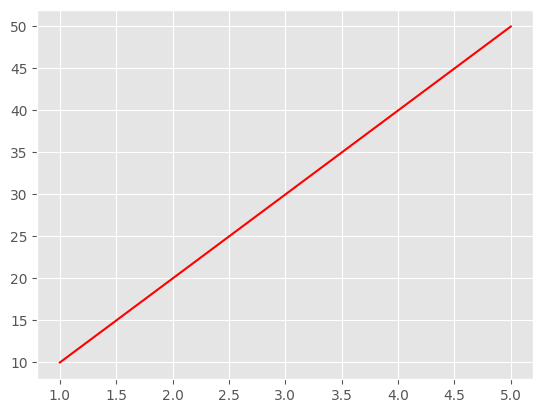

In [11]:
## jupyter 用のマジックコマンド（この１行は省略しても描画できることがほとんどです）
%matplotlib inline
## matplotlib を読み込み
import matplotlib.pyplot as plt
## グラフィックスのテーマを指定（ここではRのggplot2風のテーマ）
plt.style.use('ggplot')
## 描画データ
x = [1,2,3,4,5]
y = [10,20,30,40,50]
## ここで以下のようにしても描画されるが
# plt.plot(x, y)
## 以下のような手順を踏んで描画するのが望ましい
## 描画領域を準備
fig = plt.figure()
## 描画領域にプロット領域を確保
ax = fig.subplots()
## 描画する
ax.plot(x, y, color='r')
## Jupyter以外の環境では以下が必要
# plt.show()

インターネット上の解説の多くに Jupyter でグラフィックスを使う場合 `%matplotlib inline` の1行を追加しておくという説明がなされています。
実は、最近の Jupyter ではこの命令（Jupyterではマジックコマンドと呼びます）を書いておかなくてもプロットは表示されるのですが、なにかの都合で明示的にこの1行を加えておかないとグラフィックスが現れない場合もあるので、念のためノートブックの最初にセルに加えておいたほうがいいでしょう。

matplotlib を plt という略称でインポートしたあと、好みのテーマを指定します（テーマの指定は省略しても構いません）。
**描画領域** を `figure` 関数で用意し、プロットのための領域を `subplots` 関数で設定しています。
**プロット領域** を表すオブジェクト（ここでは、慣習的によく使われる `ax` という名前にしました）を使って描画(`plot`)しています。


<BarContainer object of 5 artists>

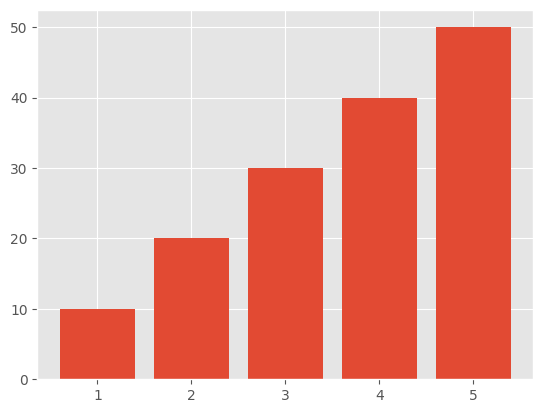

In [41]:
fig, ax = plt.subplots()
ax.bar(x,y)

Text(0.5, 1.0, 'Scatter Plot')

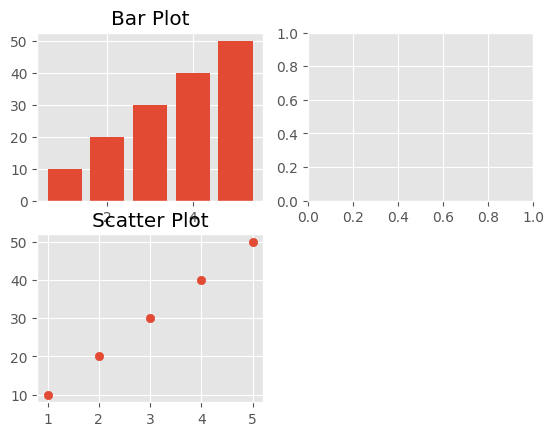

In [42]:
fig = plt.figure()
## 2行2列の1番目
ax1 = fig.add_subplot(2, 2, 1)
## 2行2列の3番目
ax2 = fig.add_subplot(2, 2, 2)
## 1行4列の4番目
ax3 = fig.add_subplot(2, 2, 3)  
ax1.bar(x,y)
ax1.set_title('Bar Plot')
ax3.scatter(x,y)
ax3.set_title('Scatter Plot')



seaborn の描画を試してみましょう。


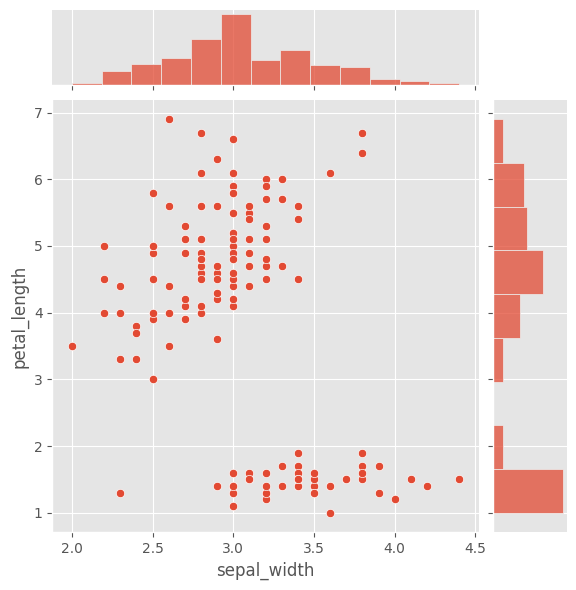

In [43]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.jointplot(x='sepal_width', y='petal_length', data=iris)

seaborn に付属している **iris** データセットを使って、散布図とヒストグラムを結合したグラフィックスを作成しました。iris はデータサイエンス分野で分析やグラフィックスのサンプルとして有名なデータセットです。

In [44]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========


## 散布図
漱石と鴎外から抽出したバイグラムのデータに話を戻し、「が、」と「で、」の2つを使って散布図を作成してみましょう。polars のデータフレームをseaborn のメソッドにそのまま渡します。
以下では、Windows および Mac、そして Ubuntu で利用可能な **日本語フォント** 候補を記述しています。



<Axes: xlabel='が、', ylabel='で、'>

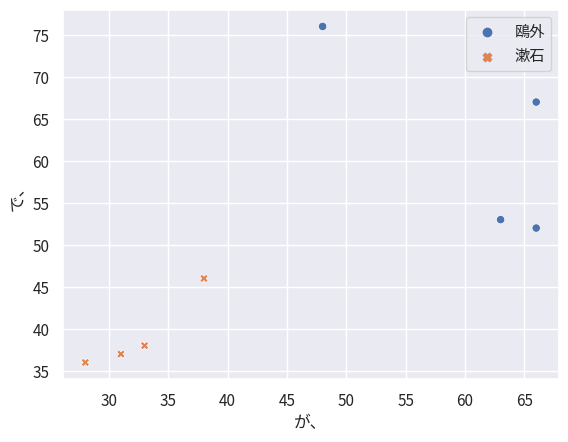

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Yu Gothic', 'Meirio', 'Hiragino Maru Gothic Pro', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
lbls = ['鴎外','鴎外','鴎外', '鴎外', '漱石', '漱石', '漱石', '漱石']
sns.scatterplot(data=bigrams_df, x='が、', y='で、', style=lbls, hue=lbls)

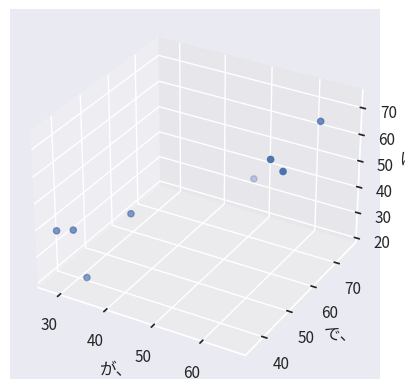

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('が、')
ax.set_ylabel('で、')
ax.set_zlabel('は、')

ax.scatter(bigrams_df['が、'], bigrams_df['で、'], bigrams_df['は、'], marker="o", linestyle='None')




## 主成分分析

ここで簡単に **主成分分析** (PCA: Principal Component Anaysis) について説明しましょう。主成分分析は多数の変数の情報を、主成分と呼ばれる少数の合成変量に変換する手法です。



1. データの共分散行列 $\Sigma$ を作成する
2. 共分散行列を固有ベクトル $A$ と固有値 $\Lambda$に分解する
3. 固有値の大きい順に任意の数 $k$ 選び $\Lambda_{k}$ とする
4. 対応する $k$ 個の固有ベクトル $A_k$ と元データの積をとる


3 品種のあやめ（菖蒲）150個体それぞれについて 4 種類の測定を行ったデータである iris の共分散行列を求めると、以下のようになります。



In [120]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
iris_cov = np.cov(iris.data, rowvar=False)
iris_cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [121]:
iris_eig, iris_vec = np.linalg.eig(iris_cov)
## 固有値を表示
print('固有値 {}'.format(iris_eig))
print('固有ベクトル {}'.format(iris_vec))

固有値 [4.22824171 0.24267075 0.0782095  0.02383509]
固有ベクトル [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [122]:
np.dot(np.dot(iris_vec, np.diag(iris_eig)), iris_vec.T)
## 以下のようにしても同じ
# np.dot(np.sqrt(iris_eig) *  iris_vec, (np.sqrt(iris_eig) *  iris_vec).T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [123]:
iris_pca = np.dot(iris.data, iris_vec.T[:, :2])
iris_pca[:5, ]

array([[-1.20673343, -2.2134993 ],
       [-0.95071637, -1.83151408],
       [-1.09610845, -2.02043295],
       [-1.18299421, -1.81938239],
       [-1.30853097, -2.27806319]])

In [124]:
np.sum(iris_eig[:2]) / np.sum(iris_eig)

0.9776852063187947

<Axes: xlabel='PC1', ylabel='PC2'>

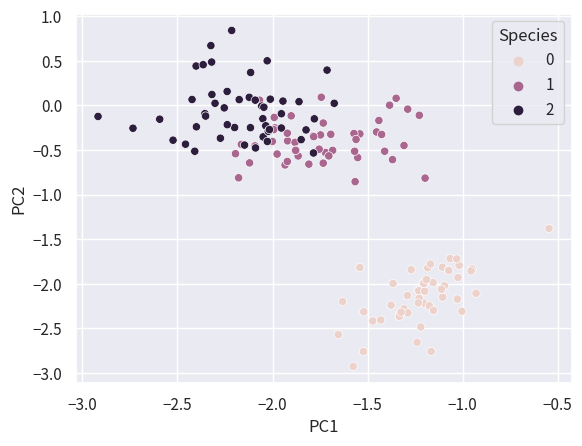

In [137]:
iris_pca_df = pl.DataFrame(iris_pca, schema=['PC1', 'PC2'])
iris_pca_df = iris_pca_df.with_columns(
    pl.Series(iris.target).alias('Species')
    )# 
iris_pca_df
sns.scatterplot(data=iris_pca_df, x='PC1', y='PC2', hue='Species')


scikit-learn パッケージの **PCA** を使って主成分分析を実行すると以下のようになります。なお、今回は seaborn に付属する iris データを使ってみます。
ちなみに、このirisデータは Pandas のデータフレームです。


In [76]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


pandas のデータフレームを polars データフレームに変換するには以下のようにします。

In [77]:
iris = pl.from_pandas(iris)

In [78]:
iris.head(3)

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""


### 標準化

一般に、主成分分析を行う場合、最初に各測定変数を標準化します。現在のデータフレームには品種を表す非数値の列がありますので、これを対象外とします。polars で実数はfloat型（ここでは`f64`）で保存されていますので、これらを指定して計算しますが、scikit learn ライブラリのメソッドに適用するには、 numpy のデータ形式に変換する必要があります。

In [79]:
(iris.select(pl.col(pl.Float64))).to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [80]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris.select(pl.col(pl.Float64)).to_numpy()
y = iris.select(pl.col('species'))
x = StandardScaler().fit_transform(x)

標準化した変数に `PCA()` を適用しますが、引数に最初の2つの主成分を利用することを指定します。


In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fitted  = pca.fit_transform(x)
pca_df = pl.DataFrame(data = pca_fitted,
                      schema = ['PC1', 'PC2'])

pca_fitted

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [82]:

pca_df = pca_df.with_columns(
    pl.Series(iris['species']).alias('Species')
    )#

pca_df



PC1,PC2,Species
f64,f64,str
-2.264703,0.480027,"""setosa"""
-2.080961,-0.674134,"""setosa"""
-2.364229,-0.341908,"""setosa"""
-2.299384,-0.597395,"""setosa"""
-2.389842,0.646835,"""setosa"""
-2.075631,1.489178,"""setosa"""
-2.444029,0.047644,"""setosa"""
-2.232847,0.223148,"""setosa"""
-2.33464,-1.115328,"""setosa"""


主成分2つを使って散布図を描きますが、その際、品種ごとにマーカーを変えたいのですが、`sns.scatterplot()` の `hue` 引数に文字列を渡すことはできません。いったん、数値に変換します。

In [23]:
mapping_dict = {"setosa":0, "versicolor":1, "virginica":2}

pca_df = pca_df.with_columns(
    pl.col('Species').map_dict(mapping_dict)
)

<Axes: xlabel='PC1', ylabel='PC2'>

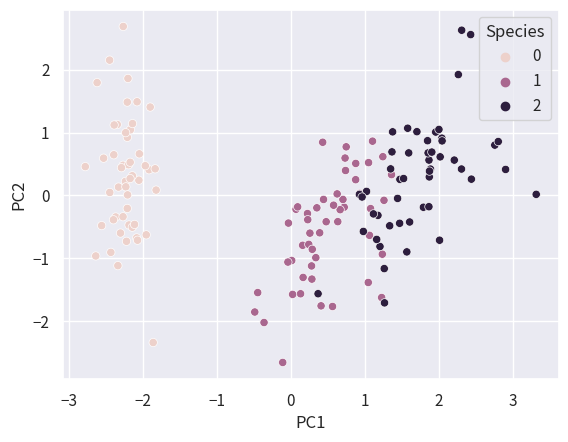

In [24]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species')


それでは、鴎外と漱石から抽出したバイグラムのデータを使って、主成分分析を実行してみましょう。
まず、標準化を行いますが、polars での方法をいくつか示します。

最初は**ラムダ式**を使う方法です。なおデータフレームのうち、数値列（ここでは頻度なので整数となっている）を対象とするため、`pl.col(pl.Int64)` と指定して計算しています。

各列に同じ処理（個別の値から、その列の平均値を引いて、その標準偏差で除する）を繰り返し適用するには、`map()` を使います。

In [16]:
bigrams_std = bigrams_df.with_columns(
     pl.col(pl.Int64).map(lambda x: (x - x.mean()) / x.std())
    )
bigrams_std

が、,て、,で、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,f64,f64,str
1.18482,0.892852,1.118672,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.18482,1.594146,0.093934,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni...."
0.084084,0.061688,1.733515,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori...."
1.001364,-0.535711,0.16225,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
-0.9555,0.269479,-0.930803,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu..."
-1.138956,-1.626614,-0.999119,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu...."
-0.527436,-0.79545,-0.315961,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidas..."
-0.833196,0.13961,-0.862488,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.tx..."


次に、polars の `sum()` `mean()` `std()` を使う方法です。

In [10]:
bigrams_std = bigrams_df.with_columns(
     (pl.col(pl.Int64) - pl.col(pl.Int64).mean()) /  pl.col(pl.Int64).std() 
    )
bigrams_std

が、,て、,で、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,f64,f64,str
1.18482,0.892852,1.118672,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.18482,1.594146,0.093934,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni.txt"""
0.084084,0.061688,1.733515,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori.txt"""
1.001364,-0.535711,0.16225,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
-0.9555,0.269479,-0.930803,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu.txt"""
-1.138956,-1.626614,-0.999119,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu.txt"""
-0.527436,-0.79545,-0.315961,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidasu.txt"""
-0.833196,0.13961,-0.862488,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.txt"""


上のコードと同じ処理なのですが、少し書き方を変えて `pl.mean()` `pl.std()` を使って書きこともできます。 

In [12]:
bigrams_df.with_columns(
     (pl.col(pl.Int64) - pl.mean(pl.Int64)) /  pl.std(pl.Int64)
    )

が、,て、,で、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,f64,f64,str
1.18482,0.892852,1.118672,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.18482,1.594146,0.093934,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni.txt"""
0.084084,0.061688,1.733515,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori.txt"""
1.001364,-0.535711,0.16225,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
-0.9555,0.269479,-0.930803,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu.txt"""
-1.138956,-1.626614,-0.999119,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu.txt"""
-0.527436,-0.79545,-0.315961,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidasu.txt"""
-0.833196,0.13961,-0.862488,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.txt"""


### 無名関数

Python においてラムダ式は **無名関数** とも言われます。
標準化の処理であれば、以下のように関数をあらかじめ作成しておいて、これをすべての列に適用することも考えられたでしょう。


In [21]:
def standard(x):
    return (x - x.mean())/ x.std()

bigrams_std = bigrams_df.with_columns(
    standard(pl.col(pl.Int64))
)
bigrams_std

が、,て、,で、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,f64,f64,str
1.18482,0.892852,1.118672,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.18482,1.594146,0.093934,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni...."
0.084084,0.061688,1.733515,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori...."
1.001364,-0.535711,0.16225,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
-0.9555,0.269479,-0.930803,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu..."
-1.138956,-1.626614,-0.999119,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu...."
-0.527436,-0.79545,-0.315961,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidas..."
-0.833196,0.13961,-0.862488,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.tx..."


あえて「が、」と「で、」の２列を削除してみます。

In [22]:
writers_6var = bigrams_df.select([
    pl.all().exclude(['が、', 'で、'])
    ])
writers_6var

て、,と、,に、,は、,も、,ら、,Text
i64,i64,i64,i64,i64,i64,str
167,47,55,73,10,44,"""ogai_gan.txt"""
194,34,81,67,25,34,"""ogai_kanoyoni...."
135,29,36,35,14,37,"""ogai_niwatori...."
112,36,47,69,21,35,"""ogai_vita.txt"""
143,86,41,40,22,51,"""soseki_eijitsu..."
70,24,41,39,10,33,"""soseki_garasu...."
102,29,32,42,18,28,"""soseki_omoidas..."
138,41,39,22,13,44,"""soseki_yume.tx..."


標準化します。

In [23]:
writers_std = writers_6var.with_columns(
    standard(pl.col(pl.Int64))
)
writers_std

て、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,str
0.892852,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.594146,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni...."
0.061688,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori...."
-0.535711,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
0.269479,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu..."
-1.626614,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu...."
-0.79545,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidas..."
0.13961,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.tx..."



データが標準化されていることを確認しましょう。平均値、つまり合計が0で、標準偏差が0であることを確認します。各列ごとに合計と標準偏差を表示させてみます。

In [24]:
writers_std.select([
    pl.col(pl.Float64).sum().suffix("_Sum"), 
    pl.col(pl.Float64).std().suffix("_Std")
])

て、_Sum,と、_Sum,に、_Sum,は、_Sum,も、_Sum,ら、_Sum,て、_Std,と、_Std,に、_Std,は、_Std,も、_Std,ら、_Std
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0


e-17 となる表示は指数による数値の表現方法で E 表記などとも呼ばれます。この例では、小数点の位置を17個左に移動した値であることを意味しています。つまり、コンピューターの計算誤差を考慮すると0に一致するということです。

もとのデータに、各平均値と標準偏差を加えたデータフレームを作成してみます。各列の行の値は同じ数値が並ぶことになります。

In [25]:
writers_std.with_columns([
    pl.col(pl.Float64).sum().suffix('SUM'),
    pl.col(pl.Float64).std().suffix('STD')
])

て、,と、,に、,は、,も、,ら、,Text,て、SUM,と、SUM,に、SUM,は、SUM,も、SUM,ら、SUM,て、STD,と、STD,に、STD,は、STD,も、STD,ら、STD
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.892852,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt""",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1.594146,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni....",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
0.061688,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori....",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
-0.535711,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt""",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
0.269479,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu...",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
-1.626614,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu....",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
-0.79545,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidas...",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0
0.13961,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.tx...",0.0,-5.8981e-17,3.3307e-16,6.6613e-16,1.1102e-16,0.0,1.0,1.0,1.0,1.0,1.0,1.0


### scikit-learnライブラリの手順

Python のデータ分析では、scikit-learnライブラリを使う機会が多くなります。scikit-learn はさまざまな分析手法に対応していますが、
データを扱い、分析用関数を適用する手順には共通性があります。

ここでインプットとするデータには数値以外の列(Text)が残っていますので、これを除いて scikit-learn のメソッドに与えます。



In [26]:
writers_6_int = writers_6var.select(pl.col(pl.Int64))
writers_6_int

て、,と、,に、,は、,も、,ら、
i64,i64,i64,i64,i64,i64
167,47,55,73,10,44
194,34,81,67,25,34
135,29,36,35,14,37
112,36,47,69,21,35
143,86,41,40,22,51
70,24,41,39,10,33
102,29,32,42,18,28
138,41,39,22,13,44


In [27]:
writers_6_int.columns

['て、', 'と、', 'に、', 'は、', 'も、', 'ら、']

In [28]:
writers_std

て、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,str
0.892852,0.317559,0.545436,1.315758,-1.161145,0.768867,"""ogai_gan.txt"""
1.594146,-0.342964,2.213827,0.995167,1.467863,-0.568293,"""ogai_kanoyoni...."
0.061688,-0.597011,-0.673773,-0.71465,-0.460076,-0.167145,"""ogai_niwatori...."
-0.535711,-0.241345,0.032084,1.102031,0.766794,-0.434577,"""ogai_vita.txt"""
0.269479,2.299126,-0.352929,-0.447491,0.942061,1.704878,"""soseki_eijitsu..."
-1.626614,-0.851058,-0.352929,-0.500923,-1.161145,-0.702009,"""soseki_garasu...."
-0.79545,-0.597011,-0.930449,-0.340628,0.240992,-1.370588,"""soseki_omoidas..."
0.13961,0.012702,-0.481267,-1.409264,-0.635344,0.768867,"""soseki_yume.tx..."


以下のコードで最後に作品名を表示させていますが、データは上書きしていません。

In [29]:
## 必要なモジュールの読み込み
from sklearn.preprocessing import StandardScaler
## モジュールの初期化
std_sc = StandardScaler()
## データへの当てはめますが、Text列は除外する必要があります

std_sc.fit(writers_6_int.to_numpy())
## 実際に標準化を実行
std_writers = std_sc.transform(writers_6_int.to_numpy())
## 確認しやすいようにデータフレームに変換
std_writers_df = pl.DataFrame(std_writers,schema= writers_6_int.columns)
std_writers_df.with_columns(
    pl.Series(writers_6var['Text']).alias("Text")
)
 

て、,と、,に、,は、,も、,ら、,Text
f64,f64,f64,f64,f64,f64,str
0.954499,0.339485,0.583095,1.406605,-1.241317,0.821953,"""ogai_gan.txt"""
1.704214,-0.366643,2.36668,1.063879,1.569211,-0.60753,"""ogai_kanoyoni...."
0.065947,-0.638231,-0.720294,-0.763993,-0.491842,-0.178685,"""ogai_niwatori...."
-0.572699,-0.258008,0.0343,1.178121,0.819737,-0.464582,"""ogai_vita.txt"""
0.288085,2.457869,-0.377297,-0.478388,1.007106,1.822591,"""soseki_eijitsu..."
-1.738923,-0.909819,-0.377297,-0.535509,-1.241317,-0.750479,"""soseki_garasu...."
-0.850372,-0.638231,-0.994692,-0.364146,0.257632,-1.46522,"""soseki_omoidas..."
0.149249,0.013579,-0.514496,-1.506566,-0.679211,0.821953,"""soseki_yume.tx..."




### 主成分分析の実行

それでは、標準化したデータに主成分分析を適用してみましょう。 scikitlearn の `PCA` モジュールを読み込んで初期化し、データに適用します。


In [30]:
from sklearn.decomposition import PCA 
## 主成分分析モジュールを初期化
pca = PCA()
##  データに適用
pca.fit(std_writers_df.to_numpy())
##  分析を実行
writers_pca = pca.transform(std_writers_df.to_numpy())
##  主成分得点を表示するためデータフレームに
writers_pca_df = pl.DataFrame(writers_pca, columns=["PC{}".format(x + 1) for x in range(len(std_writers_df.columns))])# , index=std_writers_df.index)
writers_pca_df

/tmp/ipykernel_11537/232505433.py:9: DeprecationWarning: `columns` is deprecated as an argument to `__init__`; use `schema` instead.
  writers_pca_df = pl.DataFrame(writers_pca, columns=["PC{}".format(x + 1) for x in range(len(std_writers_df.columns))])# , index=std_writers_df.index)


PC1,PC2,PC3,PC4,PC5,PC6
f64,f64,f64,f64,f64,f64
1.177384,0.172596,1.895023,-0.68558,-0.266629,-0.114389
2.903319,-1.834744,-0.29325,0.808681,0.252589,-0.06325
-1.055168,0.063285,0.203755,0.648058,-0.442675,0.114862
0.310709,-0.98124,-0.652978,-1.02888,-0.071364,0.349377
1.320118,2.828413,-0.954692,-0.379717,0.152317,-0.099849
-2.270792,-0.646225,0.390095,-0.316244,0.74296,-0.080967
-1.538758,-0.911874,-0.991922,-0.077406,-0.449078,-0.273622
-0.846811,1.309789,0.403968,1.031088,0.081881,0.167838


In [31]:
pca.explained_variance_ratio_

array([0.43769753, 0.31932291, 0.13241066, 0.081581  , 0.02332316,
       0.00566473])

In [32]:
for i, point in writers_pca_df.to_pandas().iterrows():
    print(point['PC1'], point['PC2'], i)

1.1773835294503805 0.17259562297670444 0
2.9033185377072743 -1.8347436424458698 1
-1.0551679123523787 0.06328481053672363 2
0.310709307317864 -0.9812400137044963 3
1.3201175334599478 2.8284132281263896 4
-2.270791894973456 -0.6462253034489148 5
-1.538758153970025 -0.9118736797240723 6
-0.8468109466396073 1.3097889776835354 7


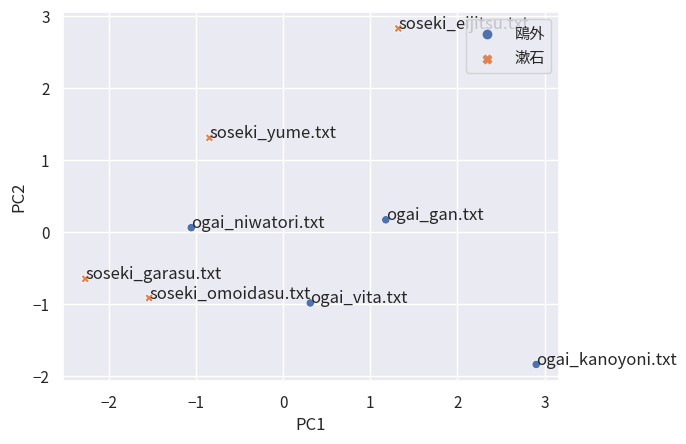

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
## 日本語を表示する準備
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
lbls = ['鴎外','鴎外','鴎外', '鴎外', '漱石', '漱石', '漱石', '漱石']
## 散布図を作成

ax = sns.scatterplot(data=writers_pca_df, x='PC1', y='PC2', style=lbls, hue=lbls)
# ## データ点に作品名を付記
for i, point in writers_pca_df.to_pandas().iterrows():
     ax.text(point['PC1'], point['PC2'], writers_6var['Text'][i])


おおむね左下に漱石が、また右上に鴎外が集まっています。


固有ベクトルを確認します。polarsの `DataFrame()` に二次元の配列だけを指定すると、各要素を列と認識します。

In [36]:
x = [[1,2,3], [4,5,6]]
x

[[1, 2, 3], [4, 5, 6]]

In [37]:
import polars as pl
pl.DataFrame(x )

column_0,column_1
i64,i64
1,4
2,5
3,6


一方、pandasの `DataFrame()` は各要素を行と判断するので、注意が必要です。

In [38]:
import pandas as pd
pd.DataFrame(x )

,0,1,2
0,1,2,3
1,4,5,6


ただし、polarsにおいても、二次元配列を numpy の配列として与えると、各要素を行とみなします。

In [39]:
import numpy as np
xarr = np.array(x)
xarr

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
pl.DataFrame(xarr)

column_0,column_1,column_2
i64,i64,i64
1,2,3
4,5,6


いま `pca.components_` はnumpy array ですが、最初の要素は各列それぞれの PC1 で、次の行の各列は PC2 の固有ベクトルとなっています。

In [41]:
pca.components_

array([[ 0.53953392,  0.29556972,  0.50707579,  0.39685406,  0.39006633,
         0.23403194],
       [ 0.0335052 ,  0.59263798, -0.32040663, -0.36286337, -0.09151529,
         0.63635866],
       [ 0.25911308, -0.20038407,  0.19409726,  0.22484109, -0.85334537,
         0.27619027],
       [ 0.51482626, -0.32165344,  0.20969358, -0.76239937,  0.06326399,
        -0.04760725],
       [-0.59518703,  0.09286036,  0.73739182, -0.25256508, -0.04787558,
         0.16523158],
       [-0.14610711, -0.63967258, -0.12174522,  0.12345683,  0.32400694,
         0.65911131]])

この場合 `pca.components_` の各要素を行の要素としてデータフレーム化する必要があるので、転値して `pl.DataFrame()` に与える必要があります。

In [46]:
print(pl.DataFrame(pca.components_.transpose(),
                   schema=std_writers_df.columns).with_columns(
    (pl.Series("PC{}".format(x + 1) for x in range(6))).alias("PC")
                   ))

shape: (6, 7)
┌───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬─────┐
│ て、      ┆ と、      ┆ に、      ┆ は、      ┆ も、      ┆ ら、      ┆ PC  │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ --- │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ str │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═════╡
│ 0.539534  ┆ 0.29557   ┆ 0.507076  ┆ 0.396854  ┆ 0.390066  ┆ 0.234032  ┆ PC1 │
│ 0.033505  ┆ 0.592638  ┆ -0.320407 ┆ -0.362863 ┆ -0.091515 ┆ 0.636359  ┆ PC2 │
│ 0.259113  ┆ -0.200384 ┆ 0.194097  ┆ 0.224841  ┆ -0.853345 ┆ 0.27619   ┆ PC3 │
│ 0.514826  ┆ -0.321653 ┆ 0.209694  ┆ -0.762399 ┆ 0.063264  ┆ -0.047607 ┆ PC4 │
│ -0.595187 ┆ 0.09286   ┆ 0.737392  ┆ -0.252565 ┆ -0.047876 ┆ 0.165232  ┆ PC5 │
│ -0.146107 ┆ -0.639673 ┆ -0.121745 ┆ 0.123457  ┆ 0.324007  ┆ 0.659111  ┆ PC6 │
└───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴─────┘



## 文章の正規化

文章を解析してデータとして利用しようとする場合、実は辞書を整備するだけでは十分ではありません。たとえば、ある文章で西暦が「２０２１年」や「2021年」、「2,021年」と、3 種類の表記が現れていたとします。しかし、この3つの表記に「意味的」な違いはあるでしょうか？恐らくはないでしょう。そこで「２０２１年」や「2021年」、「2,021年」がそれぞれ1回出現したとカウントするよりは、「2021年」の統一して3回出現したとするほうが合理的ではないでしょうか。またアルファベットや数字は全角で「ＡＢＣ１２３」、半角で「ABC123」と表示されます。意味は同じであるはずですが、コンピュータ内部では全く別の文字列として扱われます。他に、日本語のフォントには特殊な記号が用意されており、「印」には「㊞」という文字もあります。

さらに複雑なのは結合文字です。「ドラえもん」の「ド」は1文字なのですが、実は Mac でファイル名に日本語を使うと、「ド」は「ト」と「濁点」の**2文字**で表現されます。Windowsでは1文字です。Mac ないし Linux であれば、ターミナルで以下のように実行すると、その違い（あるいは表示が同じになること）が確認できます(`\U`と数値アルファベットで表されているのが1文字相当し、1行目の `\U30C9` は'ド'を、2行目の`\U30C8\U3099`が、'ト'と'濁音'を表しています)。

```
echo -e "\U30C9ラえもん\n"
echo -e "\U30C8\U3099ラえもん\n"
```



In [5]:
import unicodedata
text ='この印は１６８０円です。'
print(text)
print(unicodedata.normalize('NFKC', text))
text = 'この㊞は１６８０円です。'
print(text)
print(unicodedata.normalize('NFKC', text))
text = 'この印は￥1680です。（全角の￥）'
print(text)
print(unicodedata.normalize('NFKC', text))
text = 'この印は1680ｴﾝです。'
print(text)
print(unicodedata.normalize('NFKC', text))

この印は１６８０円です。
この印は1680円です。
この㊞は１６８０円です。
この印は1680円です。
この印は￥1680です。（全角の￥）
この印は¥1680です。(全角の¥)
この印は1680ｴﾝです。
この印は1680エンです。


In [67]:
text ='㈲'
print(unicodedata.normalize('NFKC', text))
text ='¼'
print(unicodedata.normalize('NFKC', text))

(有)
1⁄4


### 絵文字の扱い

SNSでは **絵文字** が多用されますが、この扱いもテキストをデータとする場合には考慮が必要です。
`conda install emoji` あるいは `pip install emoji` としてライブラリを導入しておきます。

なお、本書のp.24で説明した通り、requirements.txt を利用してインストールすると、emoji パッケージはすでに導入されています。
requirements.txt を利用せずにインストールする場合は以下のようにします。ただ、この場合、最新のemojiがインストールされますが、仕様が変わっているため、本書の記載どおりでは動作しないコードがあります。その点については、以下でコメント指定しています。


In [69]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 KB 3.4 MB/s eta 0:00:002.7 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193023 sha256=7690e4e374b8a06a6cc6215a0694b02a11711592707f57ad3f7dbe0aa36dd418
  Stored in directory: /home/ishida/.cache/pip/wheels/c8/2c/41/e935a3b76761ed7e34979b438c80037a0ae12b3e0b02ba8463
Successfully built emoji


In [73]:
import emoji
## 絵文字をいくつか用意
emoji_letters = 'emojis = 🤗⭕🤓🤔🤘🦁⭐🆗🆖🈲🤐🤗🤖🤑🆙⏩'
print(emoji_letters)

def remove_emoji(chars):
    return ''.join(c for c in chars if c not in emoji.UNICODE_EMOJI['en'])
## emoji 2.0 バージョンからは以下で動作します
# def remove_emoji(chars):
#    return ''.join(c for c in chars if c not in emoji.EMOJI_DATA)
print('絵文字を削除')
print(remove_emoji(emoji_letters))

emojis = 🤗⭕🤓🤔🤘🦁⭐🆗🆖🈲🤐🤗🤖🤑🆙⏩
絵文字を削除
emojis = 


ちなみに、該当する絵文字の説明文章は以下のよう emoji ライブラリや unicodedata ライブラリを使って取り出せます。

In [76]:
print(emoji.UNICODE_EMOJI['en']['🤗'])
## emoji 2.0ヴァージョンからは以下で動作します
# print(emoji.EMOJI_DATA['🤗'])

{'en': ':smiling_face_with_open_hands:', 'status': 2, 'E': 1, 'alias': [':hugging_face:', ':hugs:'], 'de': ':gesicht_mit_umarmenden_händen:', 'es': ':cara_con_manos_abrazando:', 'fr': ':visage_qui_fait_un_câlin:', 'pt': ':rosto_abraçando:', 'it': ':faccina_che_abbraccia:'}


In [77]:
print(unicodedata.name('🤗'))

HUGGING FACE


demojiというライブラリを使って説明を表示させることもできます（入力した絵文字の順番と出力される順が異なります）。

In [79]:
!pip install demoji

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 1.3 MB/s eta 0:00:00


In [80]:
import demoji
emoji_letters = '🤗⭕🤓🤔🤘🦁⭐🆗🆖🈲🤐🤗🤖🤑🆙⏩'
demoji.findall(emoji_letters)

{'🤐': 'zipper-mouth face',
 '🦁': 'lion',
 '⭐': 'star',
 '🤓': 'nerd face',
 '🆗': 'OK button',
 '⏩': 'fast-forward button',
 '🤖': 'robot',
 '🤔': 'thinking face',
 '🆖': 'NG button',
 '🆙': 'UP! button',
 '🤘': 'sign of the horns',
 '🤗': 'hugging face',
 '⭕': 'hollow red circle',
 '🈲': 'Japanese “prohibited” button',
 '🤑': 'money-mouth face'}

URLも置換すべき対象となるでしょう。

[^remove_URL]: <https://ohke.hateblo.jp/entry/2019/02/09/141500>


In [81]:
import re
text_with_url = '日本語形態素解析をRで実行したい場合は https://rmecab.jp/R を参照'
print(re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-]+', 'URL', text_with_url))

日本語形態素解析をRで実行したい場合は URL を参照


他には、全角記号と半角記号の扱いも検討しなければならないかもしれません。また、「あああ〜」などの文字列を「あ〜」に縮めるなど、テキスト分析では、その目的などによってさまざまな処理が必要になります。先に紹介した「形態素解析前の日本語文書の前処理 (Python)」というページには、さまざまな前処理手順が紹介されていますので、一度、ご覧になってください。なお、このサイトの解説では、文字列の正規化に neologd というライブラリが使われています。